# Titanic

In [1]:
# load the data
import pandas as pd

df = pd.read_csv('train.csv',index_col='PassengerId')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


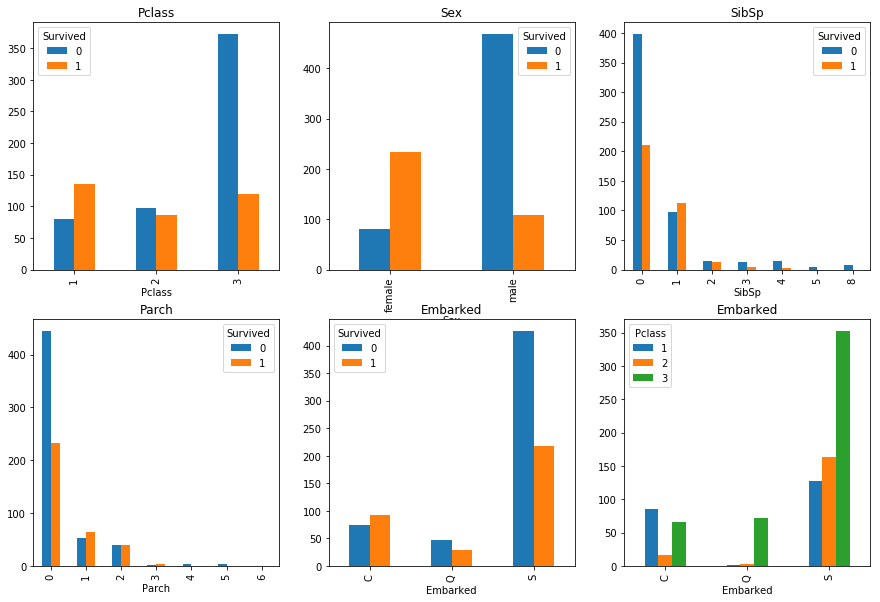

In [2]:
# few bar plots to get an idea of survival rate in some of the categories

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
ax=plt.subplot(2,3,1)
df.groupby('Pclass')['Survived'].value_counts().unstack().plot.bar(title='Pclass',ax=ax)
ax=plt.subplot(2,3,2)
df.groupby('Sex')['Survived'].value_counts().unstack().plot.bar(title='Sex',ax=ax)
ax=plt.subplot(2,3,3)
df.groupby('SibSp')['Survived'].value_counts().unstack().plot.bar(title='SibSp',ax=ax)
ax=plt.subplot(2,3,4)
df.groupby('Parch')['Survived'].value_counts().unstack().plot.bar(title='Parch',ax=ax)
ax=plt.subplot(2,3,5)
df.groupby('Embarked')['Survived'].value_counts().unstack().plot.bar(title='Embarked',ax=ax)
ax=plt.subplot(2,3,6)
df.groupby('Embarked')['Pclass'].value_counts().unstack().plot.bar(title='Embarked',ax=ax)


Passengers with shared ticket but no parents,children,siblings or spouse onboard:  75


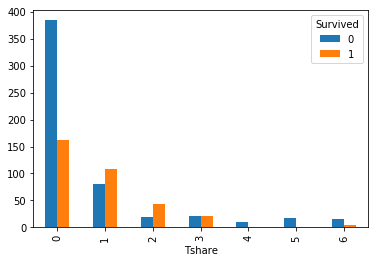

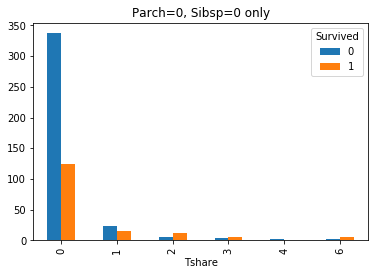

In [3]:
# add a column with number of people the passenger shares a ticket number with. Remove original Ticket column.
Tshare=pd.DataFrame(df.Ticket.value_counts()-1)
Tshare.columns = ['Tshare']
Tshare.index.name = 'Ticket'
Tshare.reset_index(inplace=True)
df = pd.merge(df,Tshare,how='outer',on='Ticket')
df.drop('Ticket',axis=1,inplace=True)

print('Passengers with shared ticket but no parents,children,siblings or spouse onboard: ',len(df[(df.Tshare>0) & (df.Parch==0) & (df.SibSp==0)]))
df.groupby('Tshare')['Survived'].value_counts().unstack().plot.bar()
df[(df.Parch==0) & (df.SibSp==0)].groupby('Tshare')['Survived'].value_counts().unstack().plot.bar(title='Parch=0, Sibsp=0 only')

In [4]:
# Only keep first letter in cabin column
import numpy as np

df['Cabin'] = df.Cabin.apply(lambda x: x[0] if type(x) is str and len(x)>0 else np.nan)
display(df.Cabin.value_counts())
display(df[~df.Cabin.isnull()].Pclass.value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [5]:
# extract titles from names

# Name format is: Surname, Title. FirstNames
# extract first word after comma, excluding full stop
df['Title']=df.Name.apply(lambda x: x.split(',')[1].strip().split(' ')[0].replace('.',''))

display(df.Title.value_counts())

# strange values
# Jonkheer and Don apparently legitimate nobility titles. 'the' should be Countess.
display(df[(df.Title=='Jonkheer') | (df.Title=='the') | (df.Title=='Don')])
df.Title.replace({'the':'Countess'},inplace=True)

# Group some titles together
df.Title.replace(['Countess', 'Sir', 'Lady', 'Don', 'Jonkheer'],'Nobility',inplace=True)
df.Title.replace(['Major', 'Col', 'Capt'],'Military',inplace=True)
df.Title.replace(['Ms', 'Mme'],'Mrs',inplace=True)
df.Title.replace(['Miss', 'Master', 'Mlle'],'Youth',inplace=True)

display(df.Title.value_counts())

# don't need name column anymore
df.drop('Name',axis=1,inplace=True)

df.head(10)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Mme           1
Capt          1
Jonkheer      1
Lady          1
the           1
Don           1
Ms            1
Name: Title, dtype: int64

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Tshare,Title
54,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,NaN,C,0,Don
356,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,B,S,2,the
849,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,NaN,S,0,Jonkheer


Mr          517
Youth       224
Mrs         127
Dr            7
Rev           6
Nobility      5
Military      5
Name: Title, dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Tshare,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,0,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,Youth
3,1,1,female,35.0,1,0,53.1000,C,S,1,Mrs
4,0,1,male,37.0,1,0,53.1000,C,S,1,Mr
5,0,3,male,35.0,0,0,8.0500,NaN,S,0,Mr
6,0,3,male,NaN,0,0,8.4583,NaN,Q,0,Mr
7,0,1,male,54.0,0,0,51.8625,E,S,0,Mr
8,0,3,male,2.0,3,1,21.0750,NaN,S,3,Youth
9,0,3,female,8.0,3,1,21.0750,NaN,S,3,Youth


In [6]:
# categorise fares
display(pd.DataFrame({1:df[df.Pclass==1].Fare.describe(),
              2:df[df.Pclass==2].Fare.describe(),
              3:df[df.Pclass==3].Fare.describe()}))

# bin fare in to quantiles for each class
for pclass in df.Pclass.unique():
    rows = df.loc[df.Pclass==pclass,'Fare']
    df.loc[df.Pclass==pclass,'Fare'] = pd.cut(rows,
           [-1,rows.quantile(0.25),rows.quantile(0.5),rows.quantile(0.75),max(rows)+1],
           labels=['q25','q50','q75','q100']) 

df.head(10)

,1,2,3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Tshare,Title
0,0,3,male,22.0,1,0,q25,NaN,S,0,Mr
1,1,1,female,38.0,1,0,q75,C,C,0,Mrs
2,1,3,female,26.0,0,0,q50,NaN,S,0,Youth
3,1,1,female,35.0,1,0,q50,C,S,1,Mrs
4,0,1,male,37.0,1,0,q50,C,S,1,Mr
5,0,3,male,35.0,0,0,q50,NaN,S,0,Mr
6,0,3,male,NaN,0,0,q75,NaN,Q,0,Mr
7,0,1,male,54.0,0,0,q50,E,S,0,Mr
8,0,3,male,2.0,3,1,q100,NaN,S,3,Youth
9,0,3,female,8.0,3,1,q100,NaN,S,3,Youth


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Adult          263
Young Adult    188
Middle-Aged    128
Teenager        42
Child           24
Baby            24
Infant          23
Senior          22
Name: Age, dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Tshare,Title
0,0,3,male,Young Adult,1,0,q25,NaN,S,0,Mr
1,1,1,female,Adult,1,0,q75,C,C,0,Mrs
2,1,3,female,Adult,0,0,q50,NaN,S,0,Youth
3,1,1,female,Adult,1,0,q50,C,S,1,Mrs
4,0,1,male,Adult,1,0,q50,C,S,1,Mr
5,0,3,male,Adult,0,0,q50,NaN,S,0,Mr
6,0,3,male,NaN,0,0,q75,NaN,Q,0,Mr
7,0,1,male,Middle-Aged,0,0,q50,E,S,0,Mr
8,0,3,male,Baby,3,1,q100,NaN,S,3,Youth
9,0,3,female,Child,3,1,q100,NaN,S,3,Youth


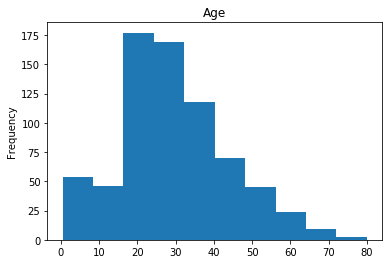

In [7]:
# categorise ages
display(df.Age.describe())
df.Age.plot.hist(title='Age')

#baby 0,1,2
#toddler 2,3
#infant 4,5,6
#child 7-12
#teen 13-17
#adult 18-30
#mature 31-50
#middle-aged 51-65
#pensioner 66+

df['Age'] = pd.cut(df.Age,
                   [-1,2,6,13,17,25,40,60,200],
                   labels=['Baby','Infant','Child','Teenager','Young Adult','Adult','Middle-Aged','Senior'])

display(df.Age.value_counts())
df.head(10)

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Tshare        0
Title         0
dtype: int64